#**Question 9** 

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

* Link : https://colab.research.google.com/github/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

## Imports

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

## Make the dataset

In [ ]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, random_state = 20)
# centers : The number of centers to generate

# Take a look at the dataset

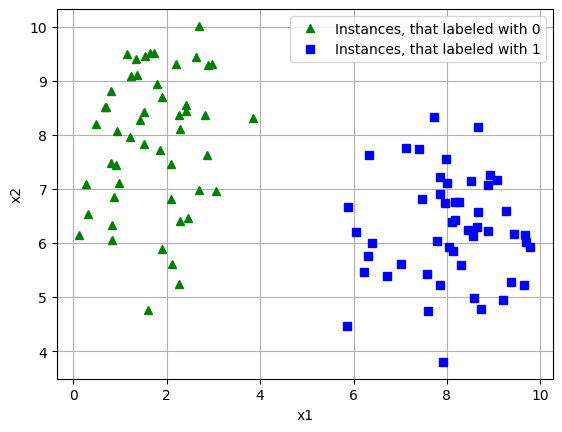

In [ ]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label = 'Instances, that labeled with 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Instances, that labeled with 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
X

array([[ 1.89139437,  5.88732584],
       [ 6.71587397,  5.39354219],
       [ 9.68065847,  6.14094309],
       [ 7.84626825,  7.22140976],
       [ 7.46555715,  6.81351979],
       [ 2.12015254,  5.61101265],
       [ 6.32663677,  7.63071738],
       [ 0.80040004,  7.47182365],
       [ 2.9671273 ,  9.30607075],
       [ 1.52314626,  8.41401879],
       [ 1.51927726,  7.82424385],
       [ 8.10269148,  6.39182356],
       [ 8.73407759,  4.7715902 ],
       [ 2.45361814,  6.46855495],
       [ 9.06790752,  7.15713819],
       [ 8.17910345,  6.7658677 ],
       [ 8.3089311 ,  5.60155905],
       [ 2.28968574,  6.40317382],
       [ 8.58292791,  4.98182878],
       [ 6.31610362,  5.75698824],
       [ 0.93392325,  8.06832216],
       [ 7.72480154,  8.32665116],
       [ 0.82370553,  6.05281051],
       [ 9.19712032,  4.95352956],
       [ 7.0237135 ,  5.61043919],
       [ 0.87712287,  6.84969507],
       [ 0.82767806,  6.34128434],
       [ 7.39235439,  7.737248  ],
       [ 0.28023097,

In [ ]:
X.shape # 100 instances(rows), 2 features(columns)

(100, 2)

In [ ]:
y # 100 labels

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y.shape

(100,)

## Train a LinearSCV

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, max_iter=10000, random_state=42))])

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

In [ ]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

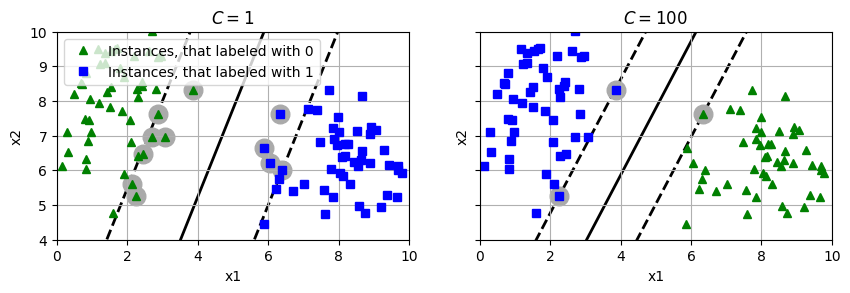

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label = 'Instances, that labeled with 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Instances, that labeled with 1')
plot_svc_decision_boundary(svm_clf1, 0, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"$C = {svm_clf1.C}$")
plt.legend(loc="upper left")
plt.axis([0, 10, 4, 10])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 0, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([0, 10, 4, 10])
plt.grid()

plt.show()

Hinge Loss : The hinge loss is a loss function used for training classifiers, most notably the SVM.

The x-axis represents the distance from the boundary of any single instance, and the y-axis represents the loss size, or penalty, that the function will incur depending on its distance.

* That dotted line on the x-axis represents the number 1. This means that when an instance’s distance from the boundary is greater than or at 1, our loss size is 0. Keep this in mind, as it will really help in understanding the maths of the function.

* If the distance from the boundary is 0 (meaning that the instance is literally on the boundary), then we incur a loss size of 1.

* We see that correctly classified points will have a small(or none) loss size, while incorrectly classified instances will have a high loss size.

* A negative distance from the boundary incurs a high hinge loss. This essentially means that we are on the wrong side of the boundary, and that the instance will be classified incorrectly.

* On the flip size, a positive distance from the boundary incurs a low hinge loss, or no hinge loss at all, and the further we are away from the boundary(and on the right side of it), the lower our hinge loss will be.

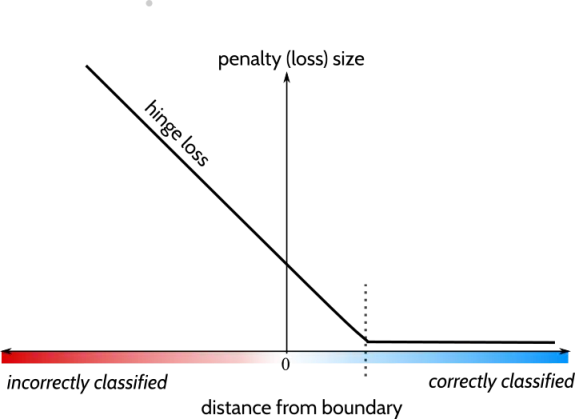

In [ ]:
C = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)

## Train an SVC

In [ ]:
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)

## Train a SGDClassifier

In [ ]:
alpha = 0.05
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

## Evaluation

In [ ]:
cross_val_score(lin_clf, X, y, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [ ]:
cross_val_score(svc_clf, X, y, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [ ]:
cross_val_score(sgd_clf, X, y, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [ ]:
y_pred = cross_val_predict(sgd_clf, X, y, cv=3)
cm = confusion_matrix(y, y_pred)
cm

array([[50,  0],
       [ 0, 50]])

## Comparison

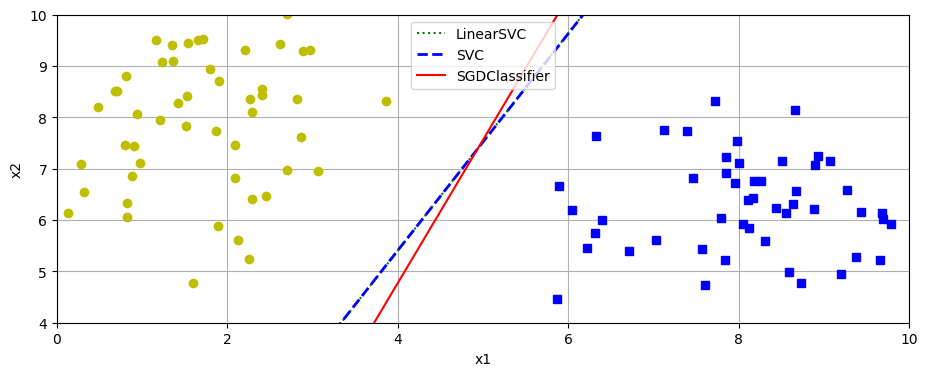

In [ ]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "g:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth = 2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label = 1
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label = 0
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="upper center")
plt.axis([0, 10, 4, 10])
plt.grid()

plt.show()

In [ ]:
lin_line[0]

array([-28.19906667, -62.72041873])

In [ ]:
lin_line[1]

array([37.965134  , 77.27638816])

In [ ]:
lin_clf.coef_[0, 0]

1.9827754558604975

In [ ]:
lin_clf.coef_[0, 1]

-0.3941636165149479

In [ ]:
lin_clf.coef_

array([[ 1.98277546, -0.39416362]])

In [ ]:
-lin_clf.intercept_

array([-0.05932102])